# Churn Reason Anaysis

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
print("Libraries imported successfully.....")
#Importing data
df = pd.read_csv("telecom_customer_churn.csv")

print("Data imported successfully.....")



Libraries imported successfully.....
Data imported successfully.....


In [2]:
# Remove the columns "Customer Status", "Churn Category", and "Churn Reason"
columns_to_remove = ["Customer Status", "Churn Category", "Churn Reason"]
df_train = df.drop(columns=columns_to_remove)

# Take out 30% of the DataFrame as the test set
test_size = 0.3
df_test = df_train.sample(frac=test_size, random_state=42)
df = df.drop(index=df_test.index)


In [3]:
df_reason = df[df['Customer Status'] == 'Churned']
df_reason 


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
18,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,...,Credit Card,62.70,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
21,0023-XUOPT,Female,26,Yes,0,Carnelian Bay,96140,39.227434,-120.091806,1,...,Bank Withdrawal,94.10,1215.60,0.0,0,566.28,1781.88,Churned,Other,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,9921-ZVRHG,Female,44,No,0,Traver,93673,36.456091,-119.486225,0,...,Bank Withdrawal,80.45,1072.00,0.0,0,16.66,1088.66,Churned,Competitor,Competitor had better devices
7007,9940-RHLFB,Female,53,No,0,Sunset Beach,90742,33.719221,-118.073596,0,...,Bank Withdrawal,75.30,75.30,0.0,0,26.06,101.36,Churned,Competitor,Competitor made better offer
7012,9947-OTFQU,Male,65,No,0,Covina,91722,34.097345,-117.906736,0,...,Bank Withdrawal,74.40,1074.30,0.0,0,436.65,1510.95,Churned,Competitor,Competitor had better devices
7020,9961-JBNMK,Male,79,No,0,Desert Center,92239,33.889605,-115.257009,0,...,Bank Withdrawal,-1.00,2030.30,10.2,0,887.67,2907.77,Churned,Dissatisfaction,Product dissatisfaction


In [4]:
#Separate numerical and categorical columns
from preprolib import myfunctions

num_cols_res = []
cat_cols_res = []

ignore_list = ['Zip Code', 'Longitude', 'Latitude', 
                'Customer ID', 'Churn Category', 
                'Churn Reason', 'Customer Status', 'City']

myfunctions.cat_or_num(df_reason, ignore_list, num_cols_res, cat_cols_res)

label = 'Customer Status'


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

# Define the imputer
imputer = SimpleImputer(strategy='most_frequent')  # You can choose the strategy as per your requirement

# Define the column transformer
preprocessor = make_column_transformer((imputer, df_reason.columns))

# Fit and transform the DataFrame through the pipeline
df_transformed = preprocessor.fit_transform(df_reason)

# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=df_reason.columns)

# Set the data types of the columns to match the original DataFrame
for col in df_reason.columns:
    df_transformed[col] = df_transformed[col].astype(df_reason[col].dtype)

# Display the transformed DataFrame
print(df_transformed)


     Customer ID  Gender  Age Married  Number of Dependents           City  \
0     0004-TLHLJ    Male   50      No                     0     Costa Mesa   
1     0011-IGKFF    Male   78     Yes                     0       Martinez   
2     0013-EXCHZ  Female   75     Yes                     0      Camarillo   
3     0022-TCJCI    Male   79      No                     0      Daly City   
4     0023-XUOPT  Female   26     Yes                     0  Carnelian Bay   
...          ...     ...  ...     ...                   ...            ...   
1313  9921-ZVRHG  Female   44      No                     0         Traver   
1314  9940-RHLFB  Female   53      No                     0   Sunset Beach   
1315  9947-OTFQU    Male   65      No                     0         Covina   
1316  9961-JBNMK    Male   79      No                     0  Desert Center   
1317  9992-RRAMN    Male   40     Yes                     0      Riverbank   

      Zip Code   Latitude   Longitude  Number of Referrals  ...

In [6]:
df_reason = df_transformed


In [7]:
# Check for null values in categorical columns
for col in cat_cols_res:
    null_count = df_reason[col].isnull().sum()
    print(f"Number of null values in '{col}': {null_count}")


Number of null values in 'Gender': 0
Number of null values in 'Married': 0
Number of null values in 'Offer': 0
Number of null values in 'Phone Service': 0
Number of null values in 'Multiple Lines': 0
Number of null values in 'Internet Service': 0
Number of null values in 'Internet Type': 0
Number of null values in 'Online Security': 0
Number of null values in 'Online Backup': 0
Number of null values in 'Device Protection Plan': 0
Number of null values in 'Premium Tech Support': 0
Number of null values in 'Streaming TV': 0
Number of null values in 'Streaming Movies': 0
Number of null values in 'Streaming Music': 0
Number of null values in 'Unlimited Data': 0
Number of null values in 'Contract': 0
Number of null values in 'Paperless Billing': 0
Number of null values in 'Payment Method': 0


In [8]:
# Check for null values in categorical columns
for col in num_cols_res:
    null_count = df_reason[col].isnull().sum()
    print(f"Number of null values in '{col}': {null_count}")


Number of null values in 'Age': 0
Number of null values in 'Number of Dependents': 0
Number of null values in 'Number of Referrals': 0
Number of null values in 'Tenure in Months': 0
Number of null values in 'Avg Monthly Long Distance Charges': 0
Number of null values in 'Avg Monthly GB Download': 0
Number of null values in 'Monthly Charge': 0
Number of null values in 'Total Charges': 0
Number of null values in 'Total Refunds': 0
Number of null values in 'Total Extra Data Charges': 0
Number of null values in 'Total Long Distance Charges': 0
Number of null values in 'Total Revenue': 0


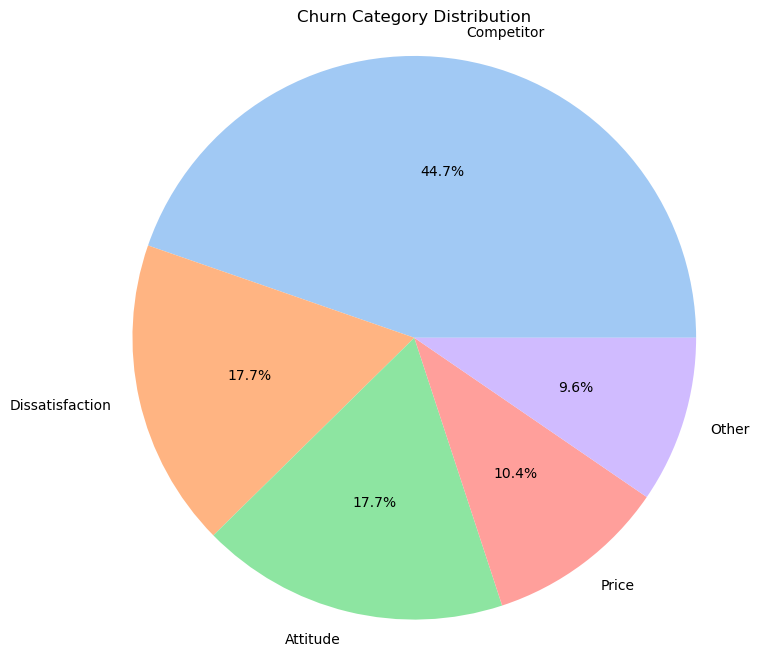

In [9]:
# Calculate the value counts for each 'Churn Category'
churn_category_counts = df_reason['Churn Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_category_counts, labels=churn_category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Churn Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


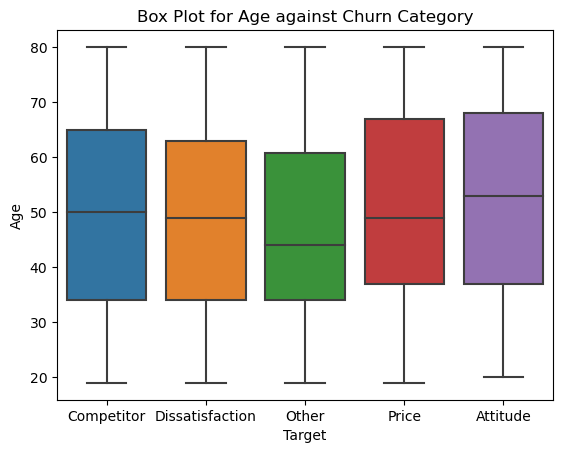

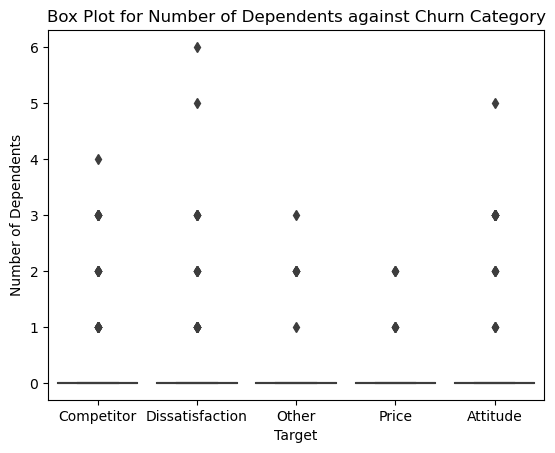

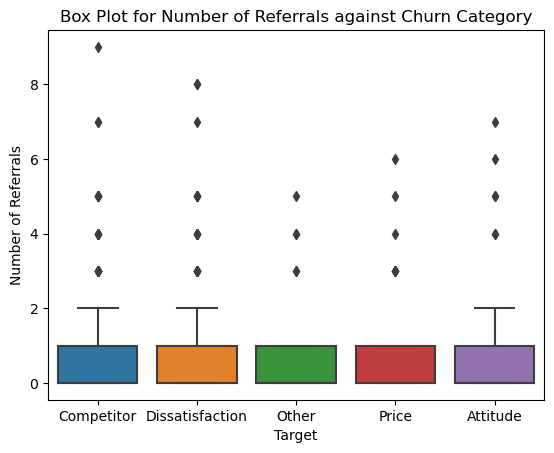

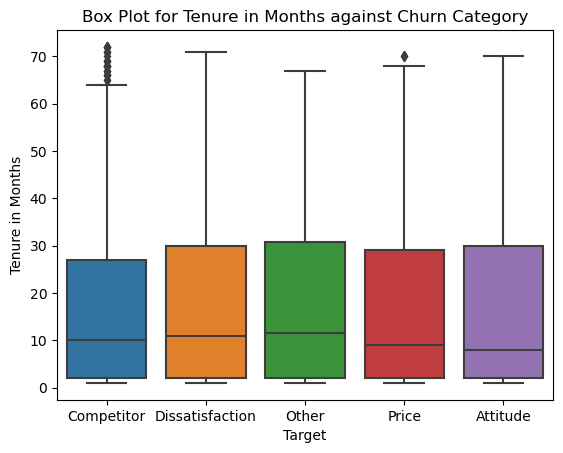

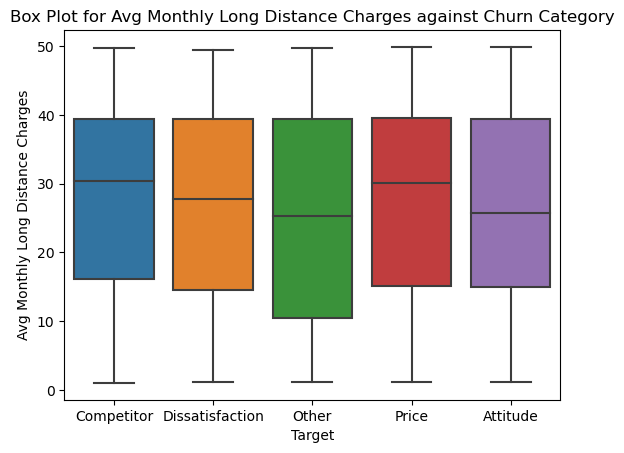

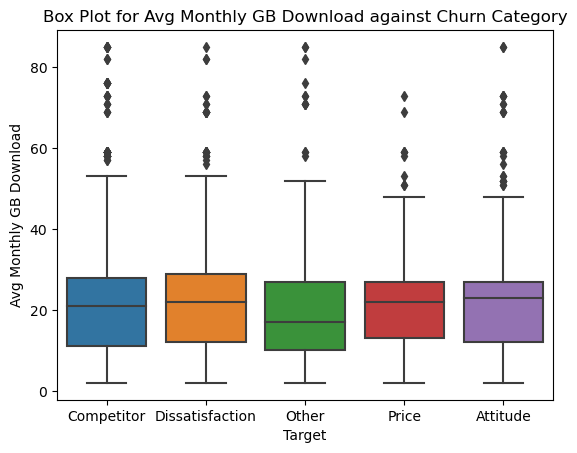

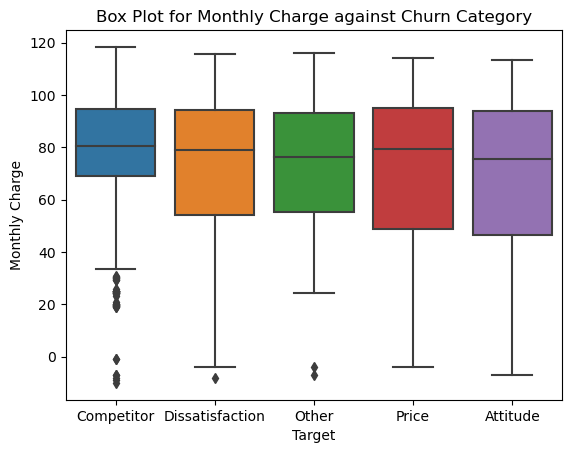

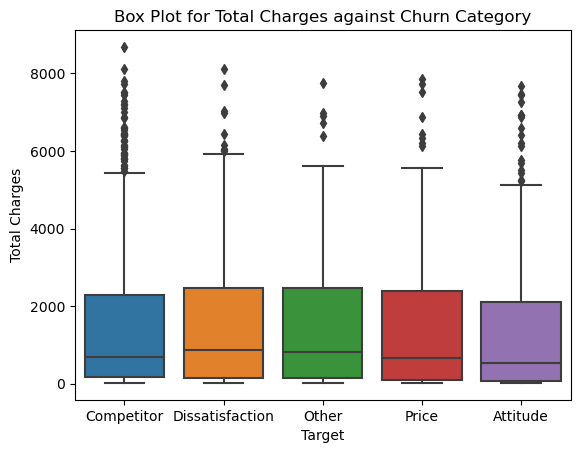

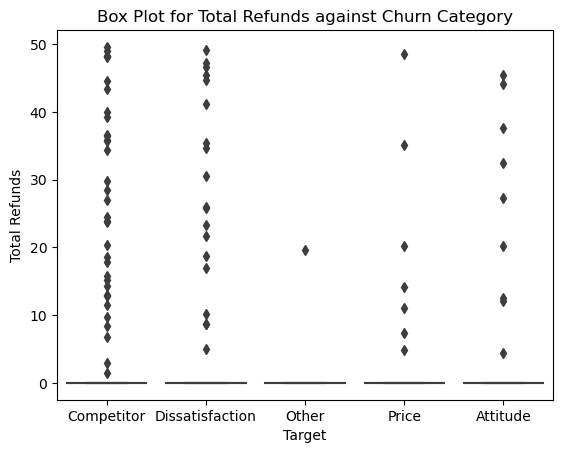

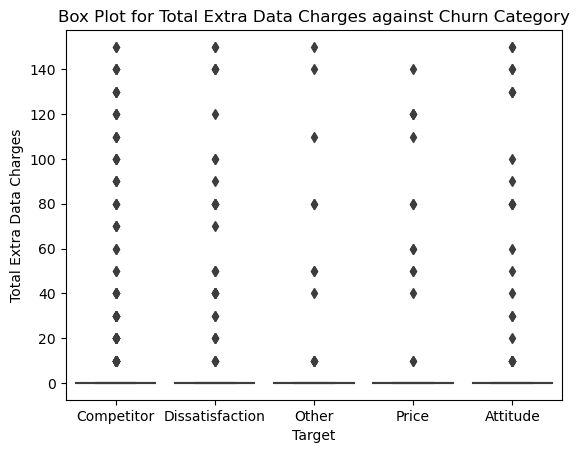

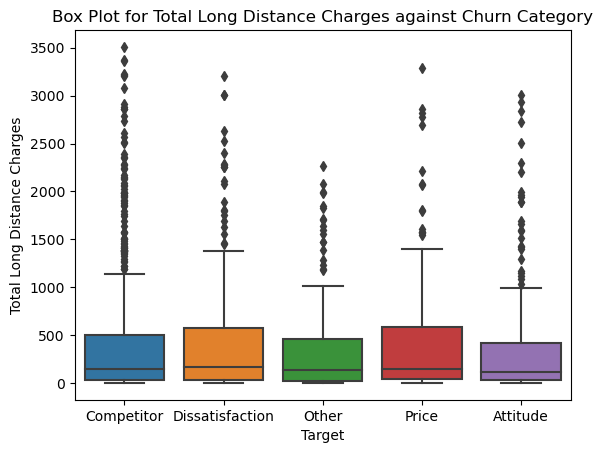

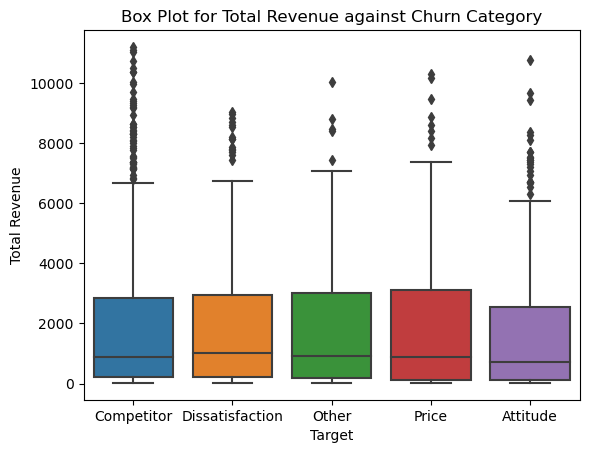

In [10]:
# Box plots for numerical data
for column in num_cols_res:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(x='Churn Category', y=column, data=df_reason)
    plt.title(f'Box Plot for {column} against {"Churn Category"}')
    plt.ylabel(column)
    plt.xlabel('Target')
    plt.show()



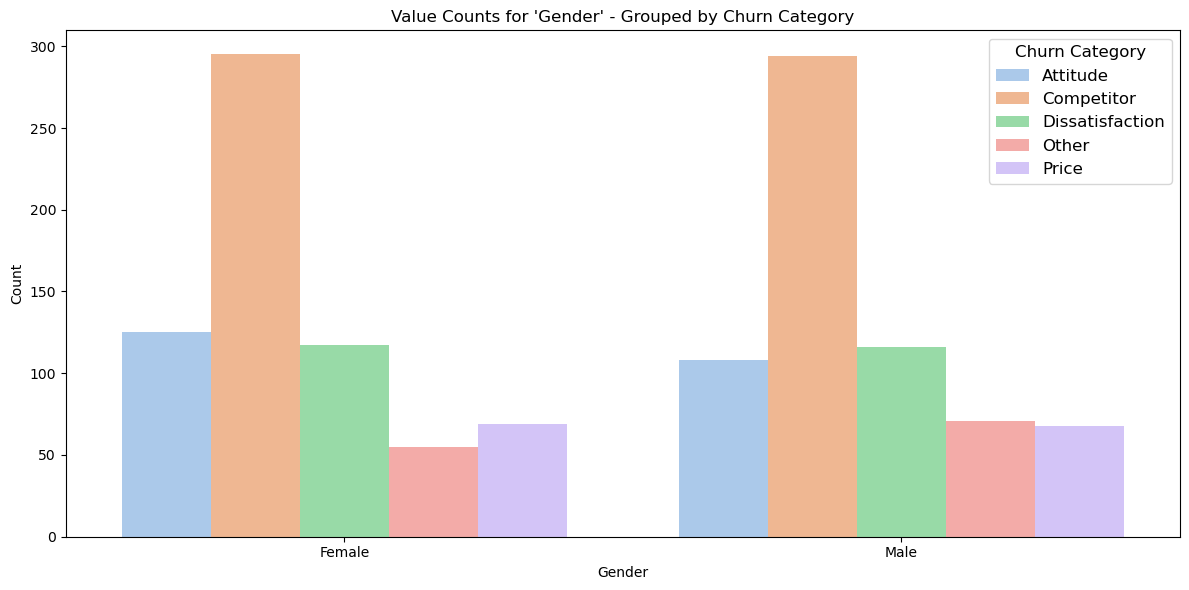

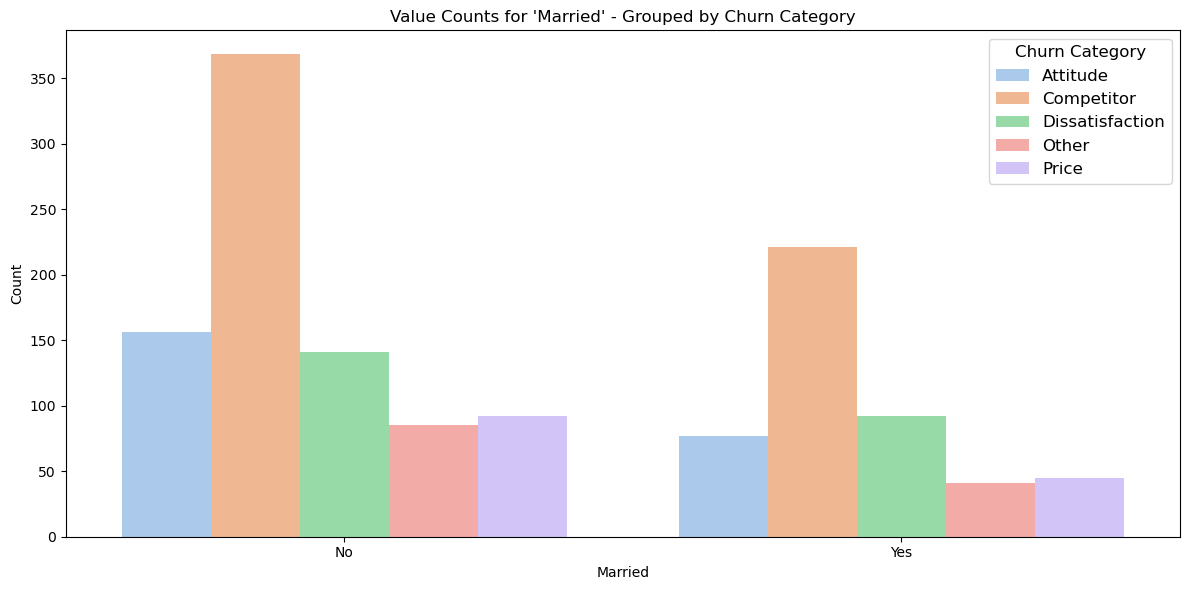

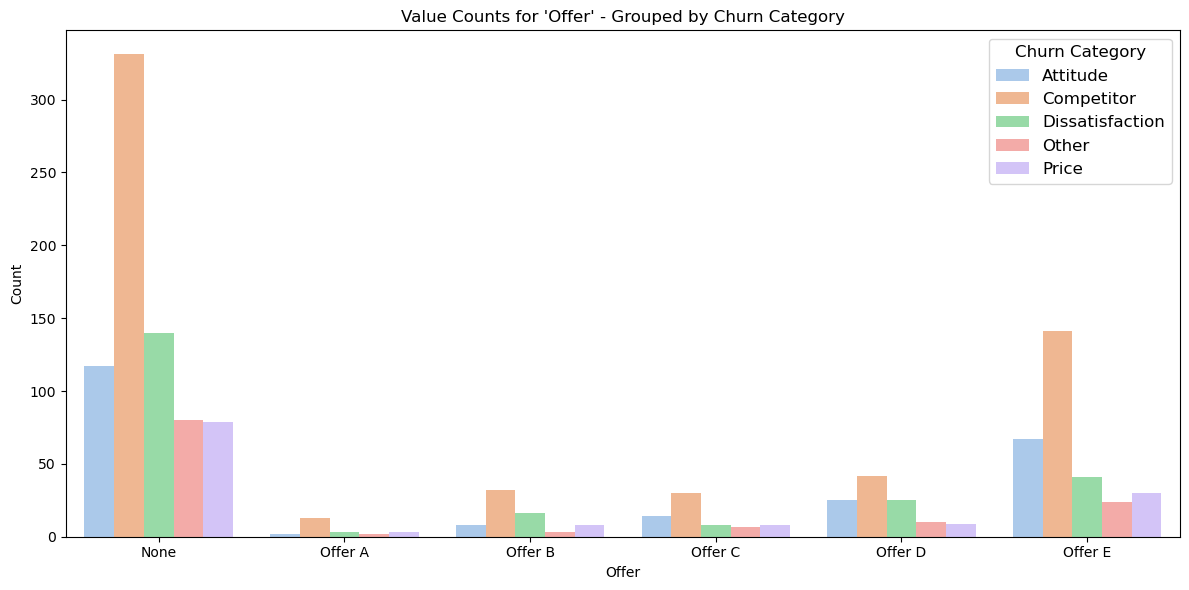

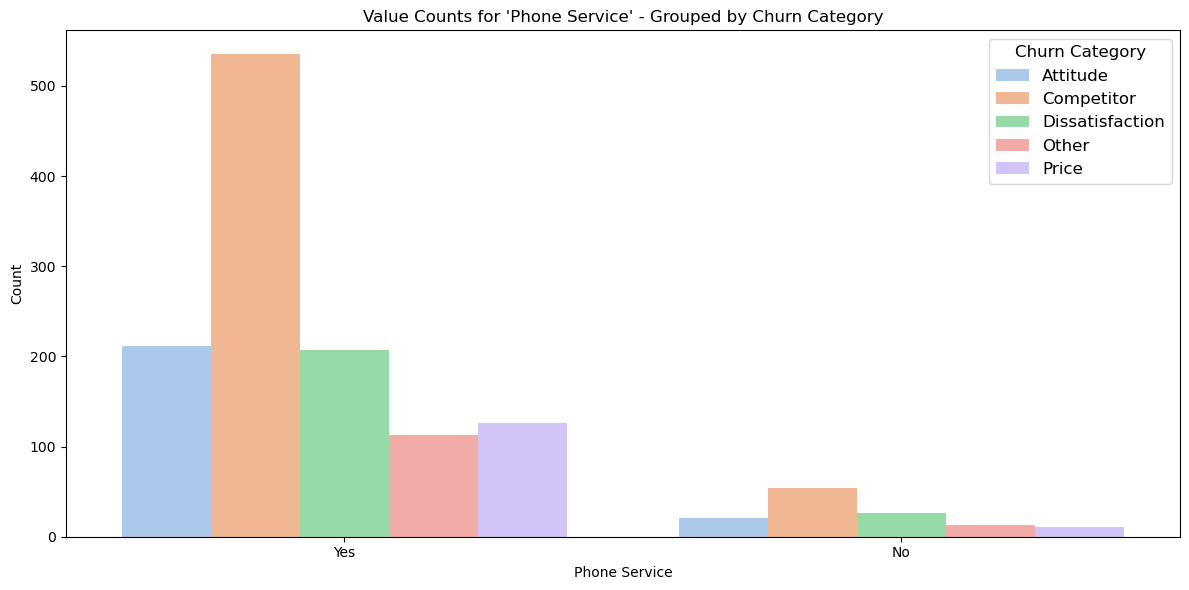

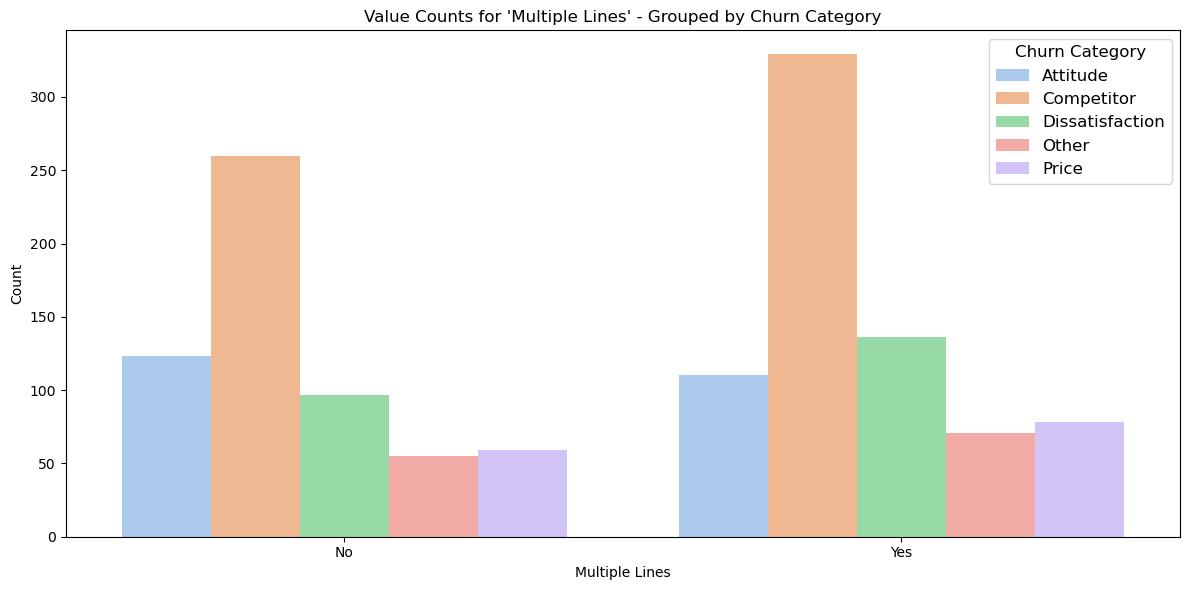

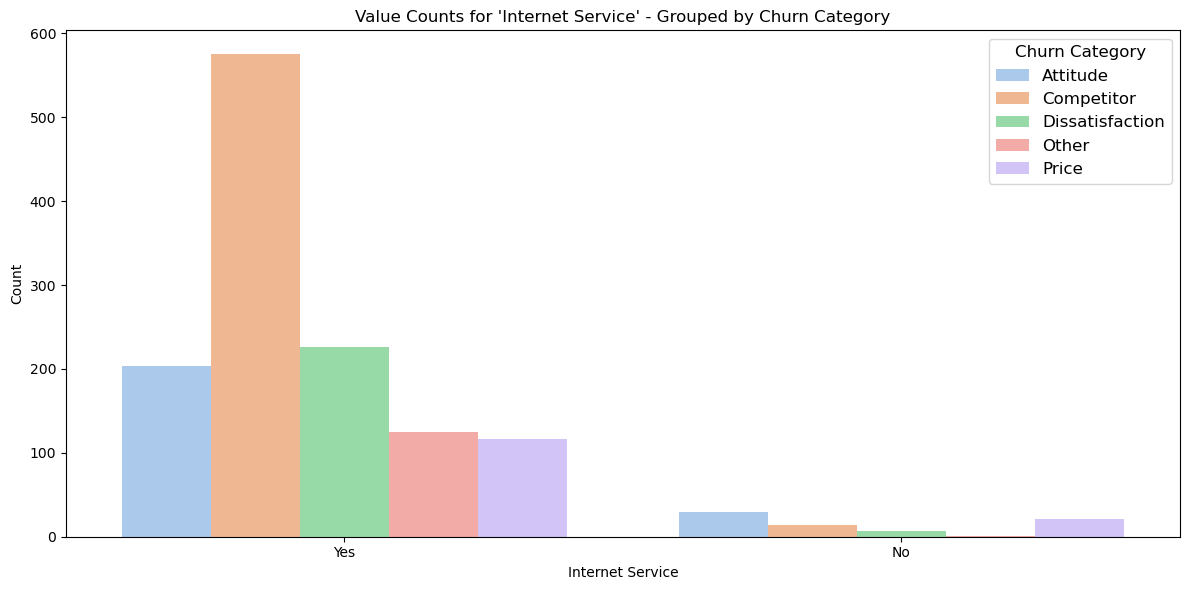

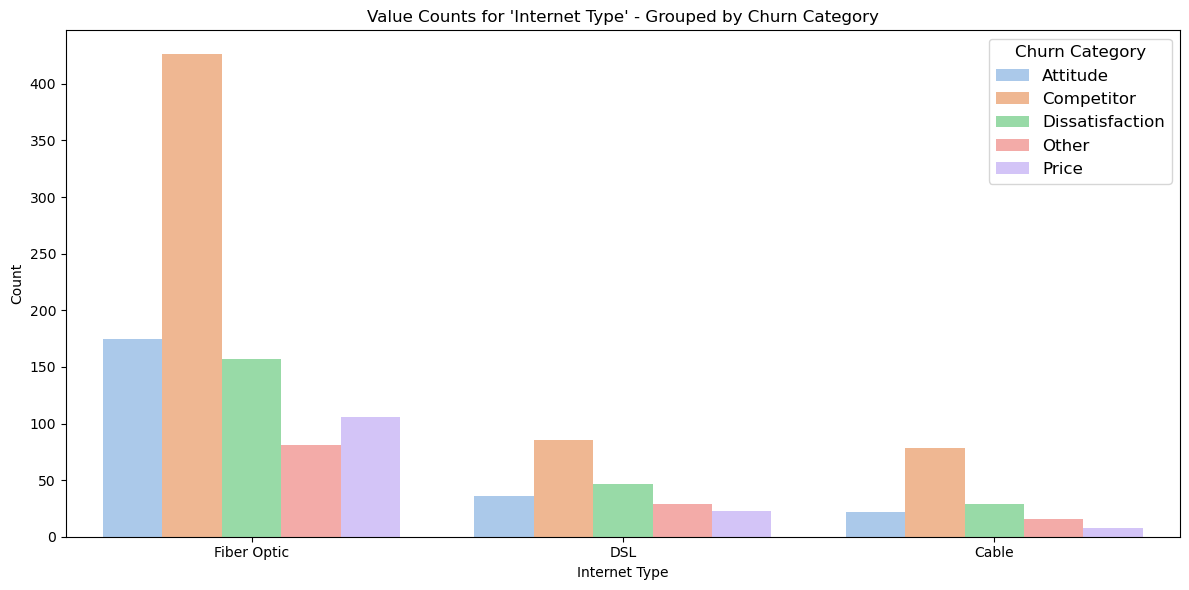

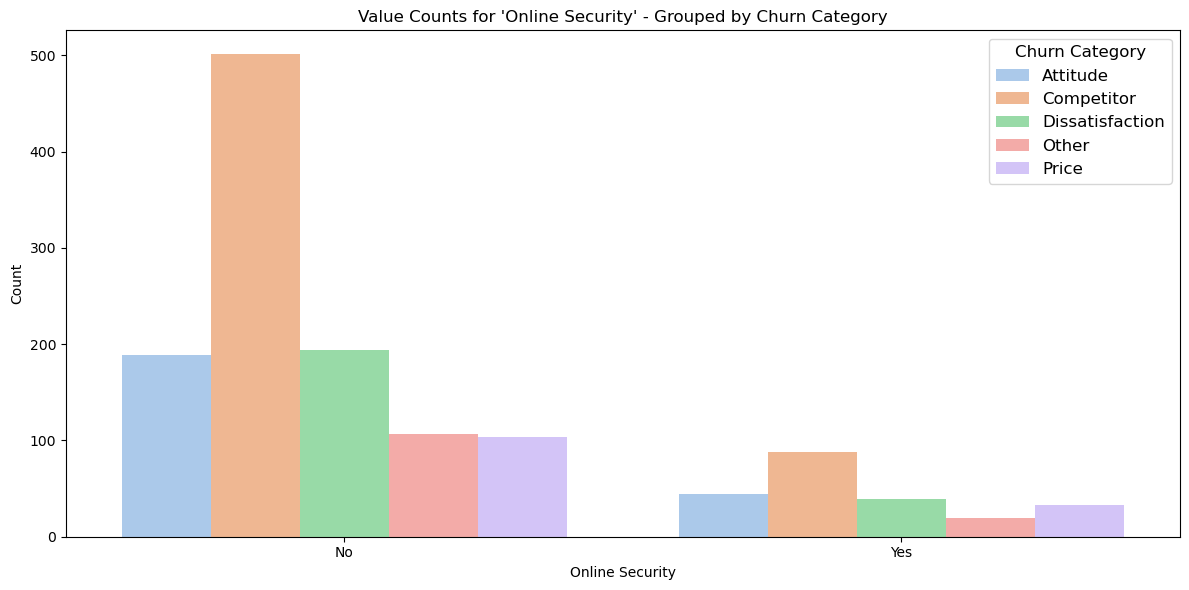

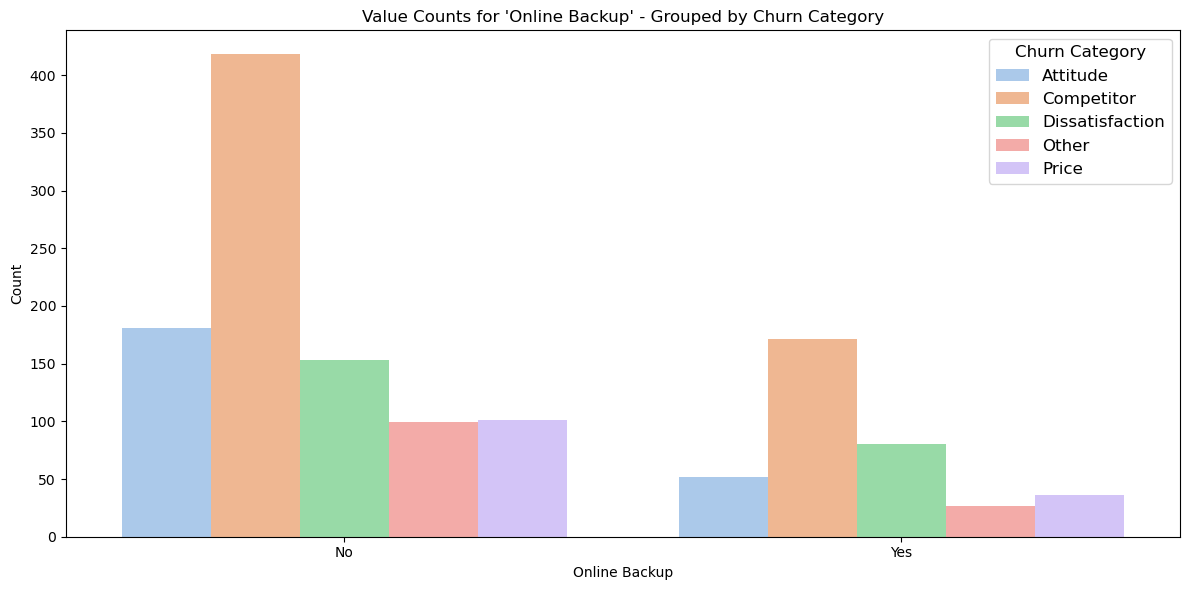

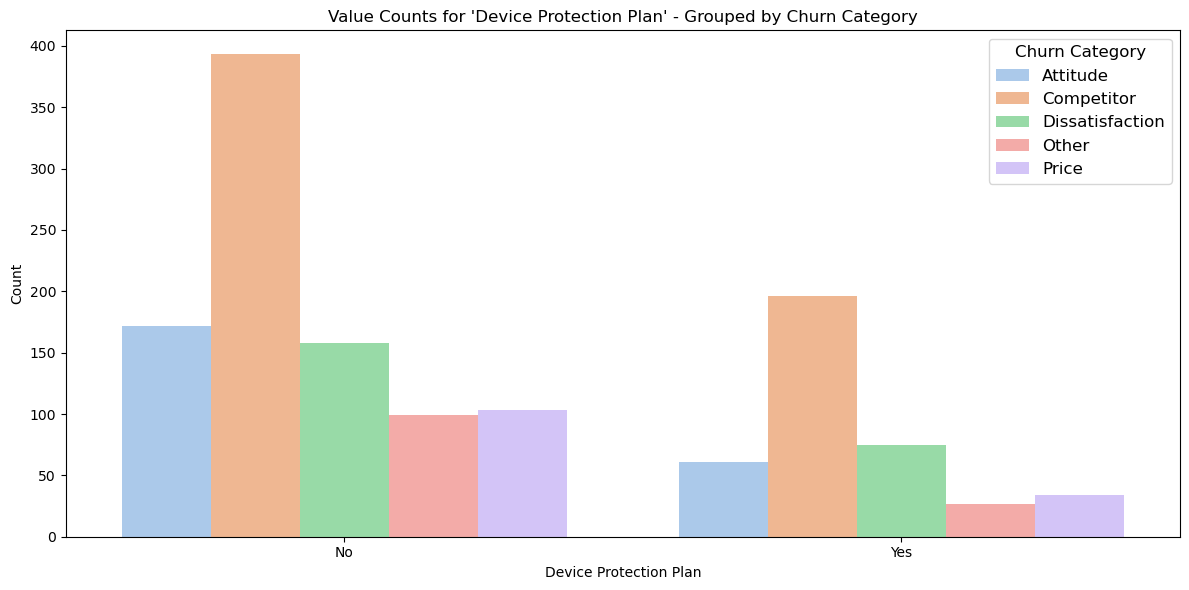

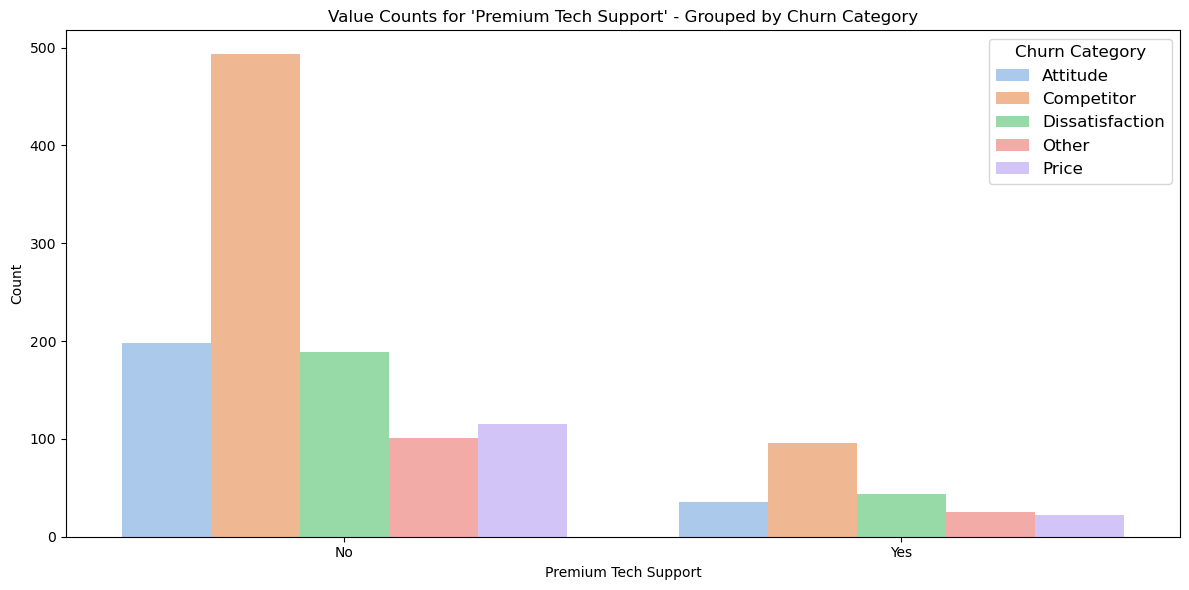

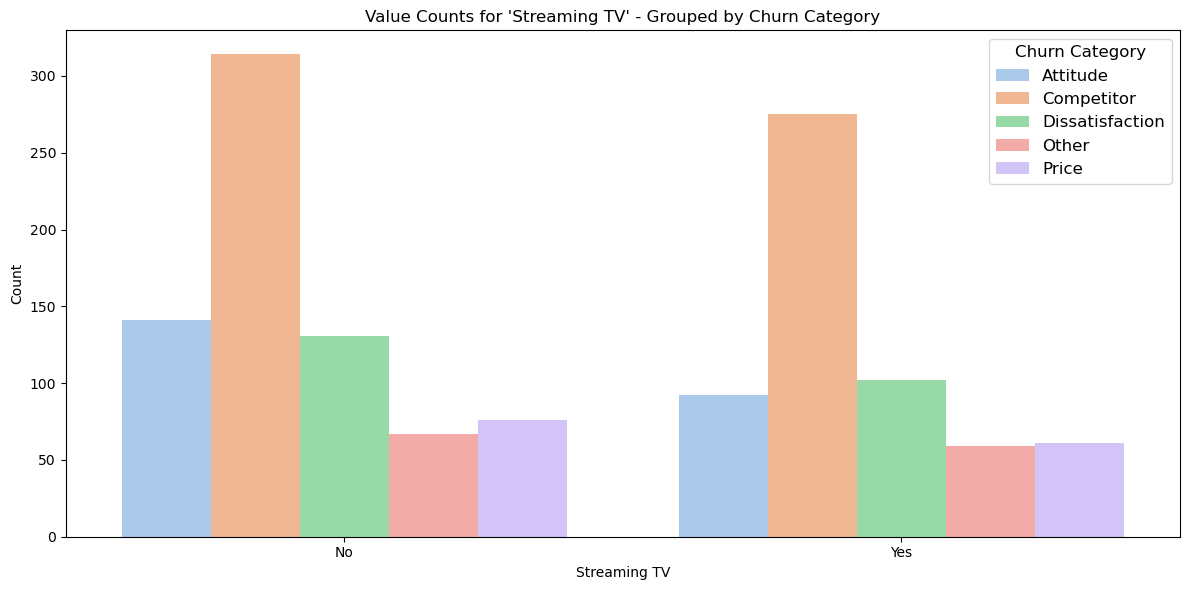

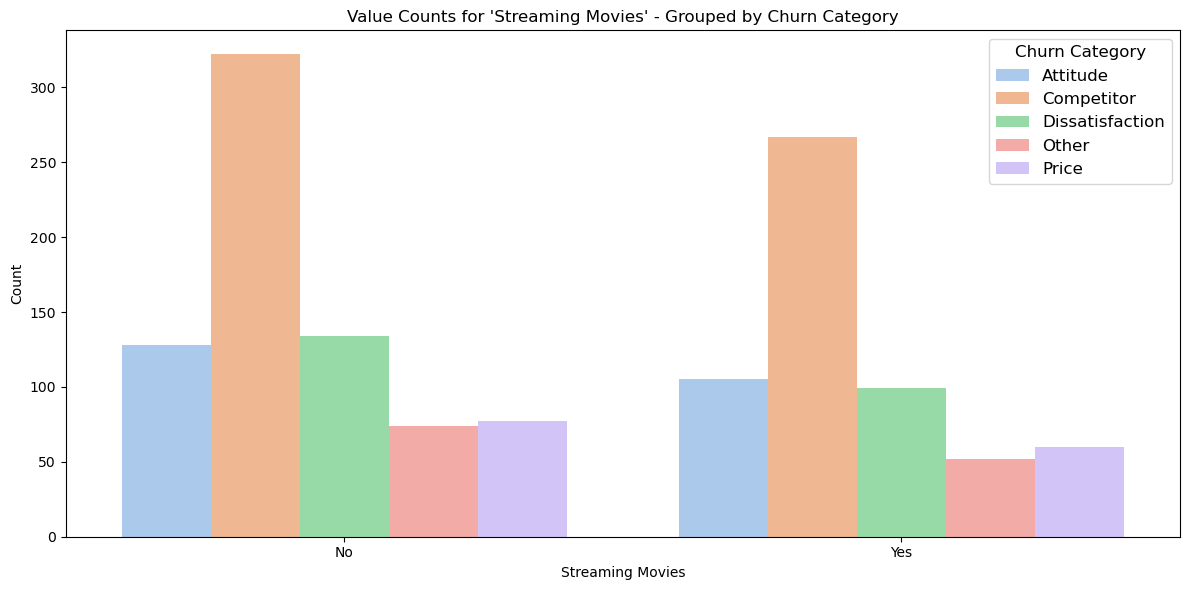

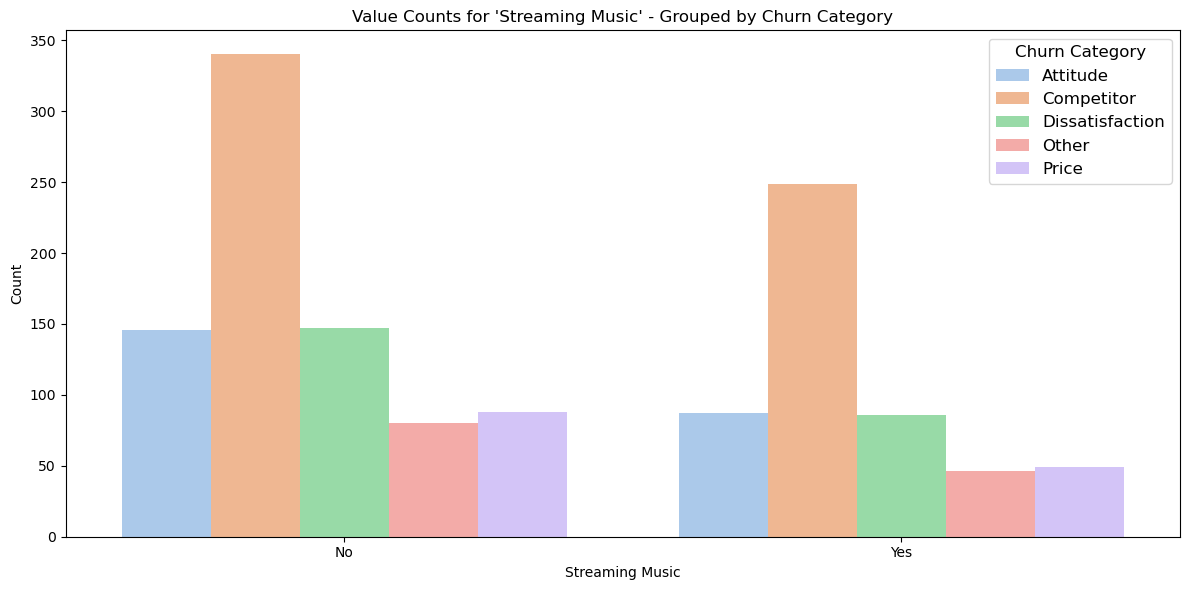

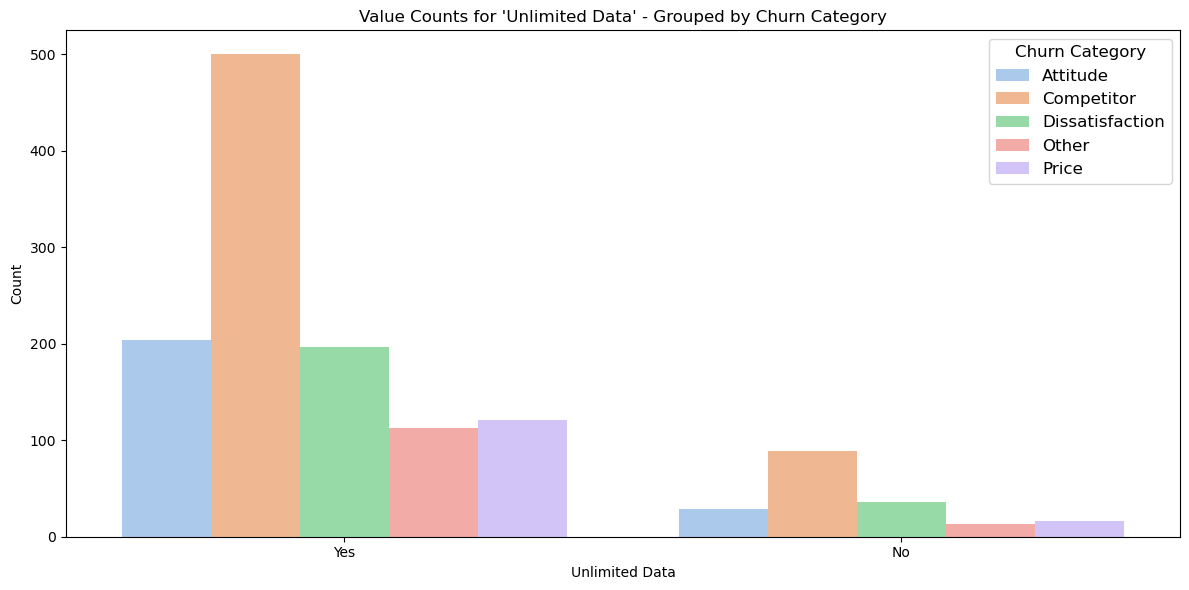

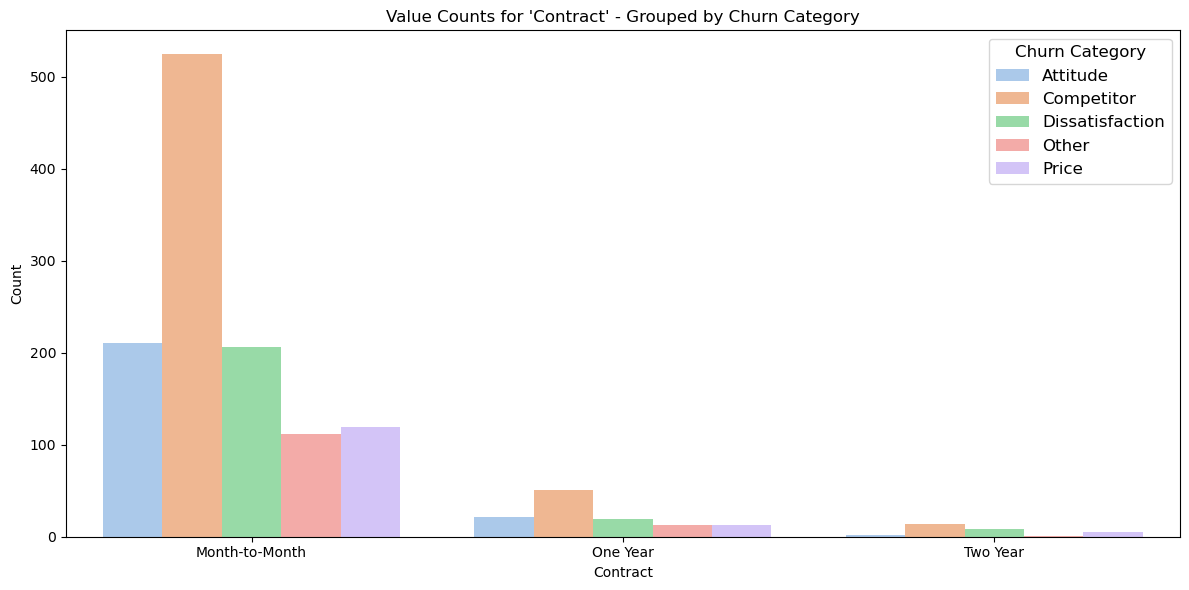

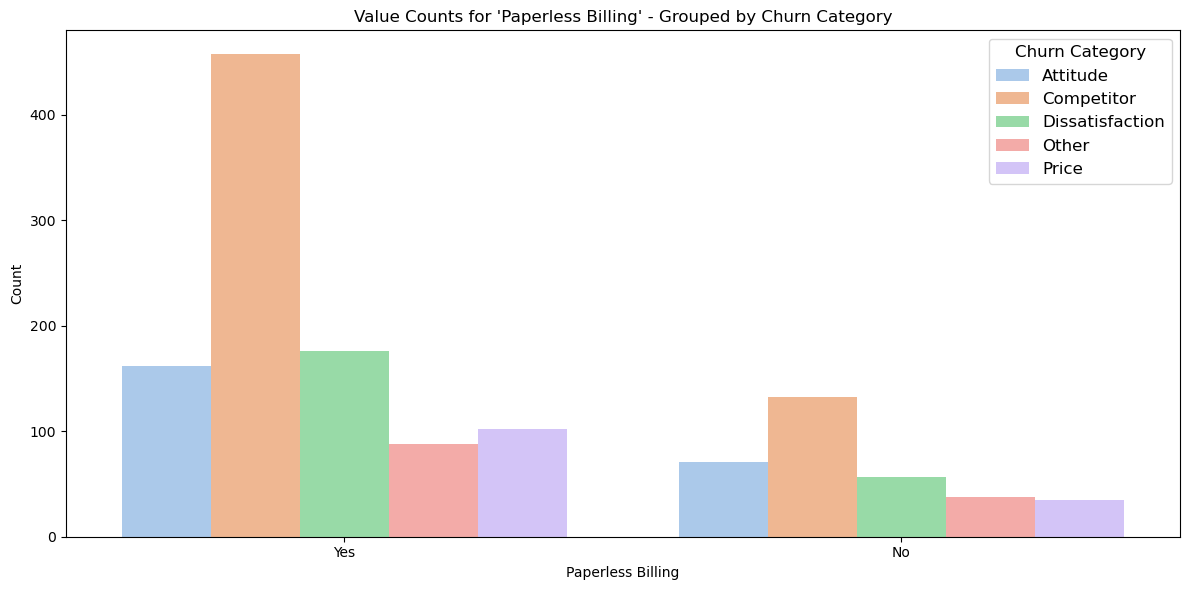

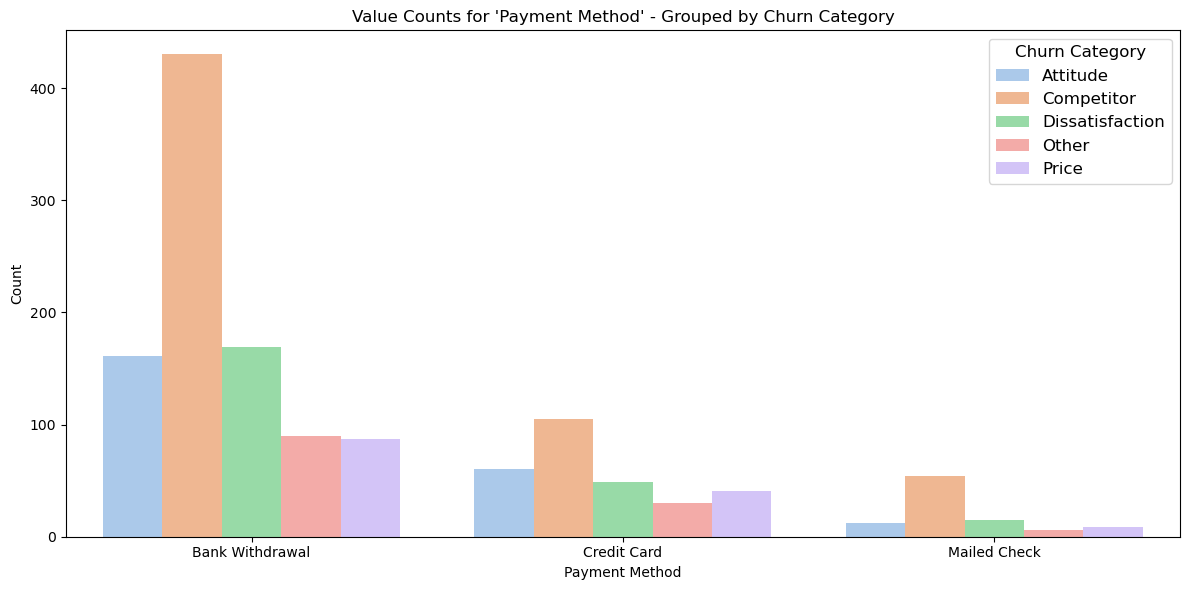

In [11]:
# Group by 'Churn Category' and each categorical column, and get value counts for each category
for col in cat_cols_res:
    plt.figure(figsize=(12, 6))
    plt.title(f"Value Counts for '{col}' - Grouped by Churn Category")

    # Group the data by 'Churn Category' and the current column, and get value counts for each category
    group_counts = df_reason.groupby(['Churn Category', col]).size().unstack()

    # Sort the values in each category based on their counts in descending order
    group_counts_sorted = group_counts.apply(lambda x: x.sort_values(ascending=False), axis=1)

    # Plot the grouped bar chart
    sns.barplot(data=group_counts_sorted.reset_index().melt(id_vars='Churn Category', value_name='Count'),
                x=col, y='Count', hue='Churn Category', palette='pastel')

    # Set labels and legend
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn Category', title_fontsize='large', fontsize='large')

    plt.tight_layout()
    plt.show()

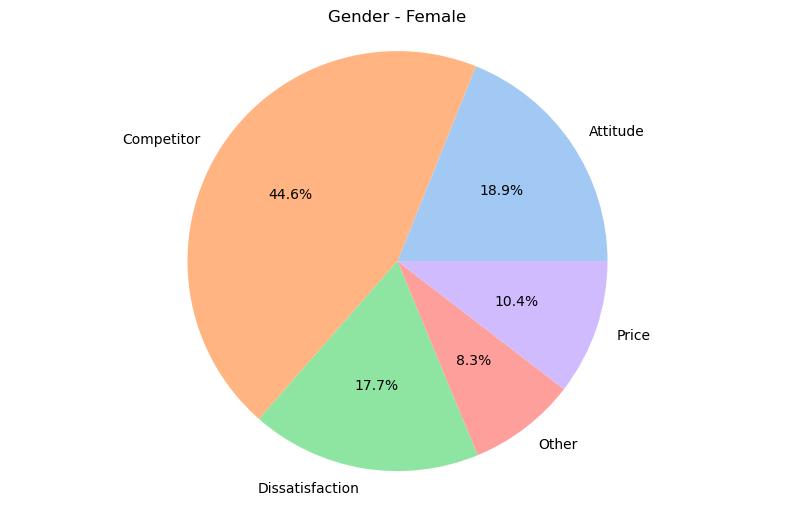

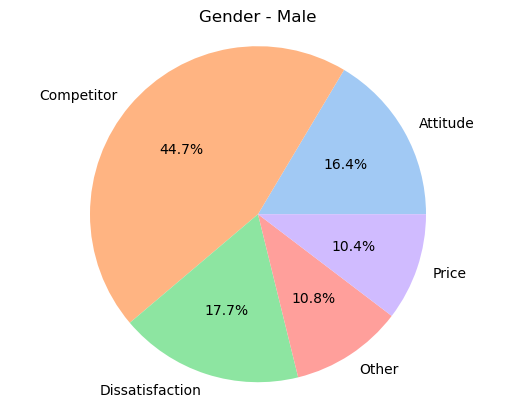

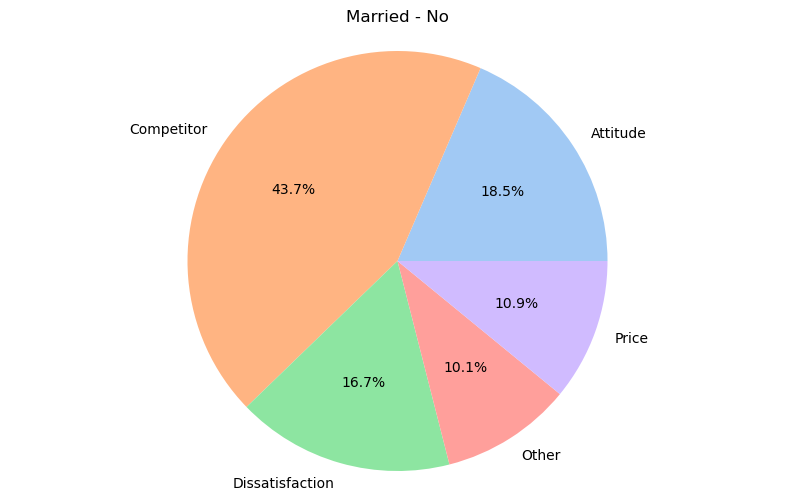

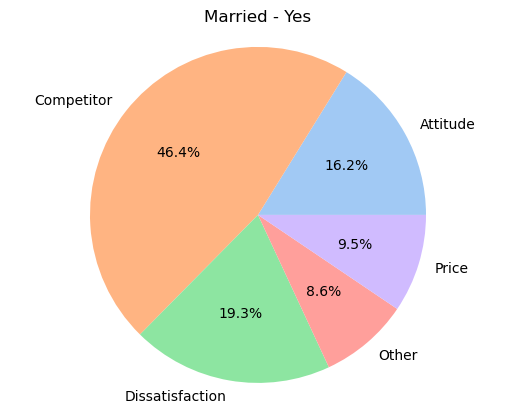

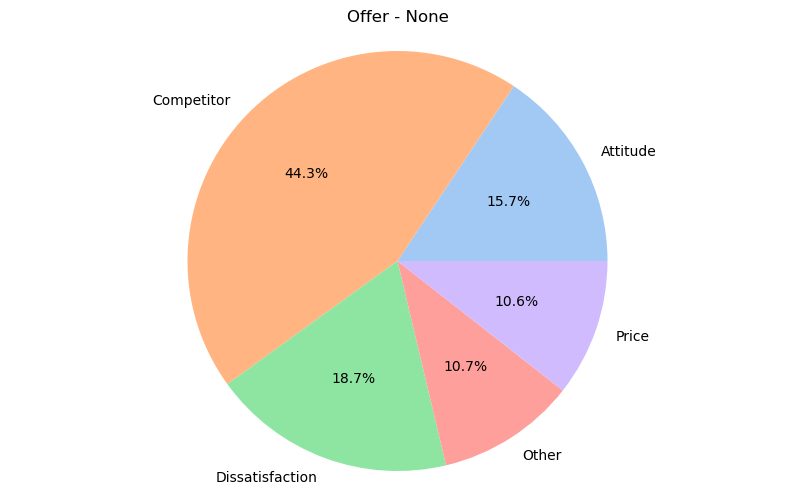

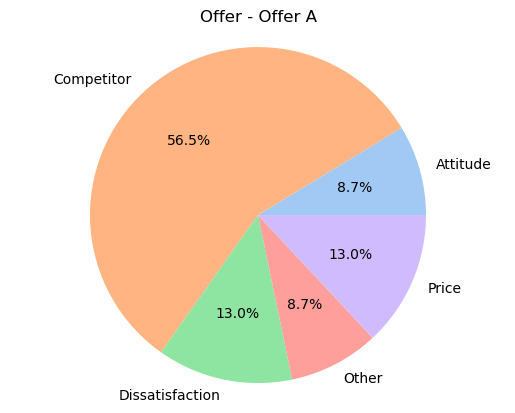

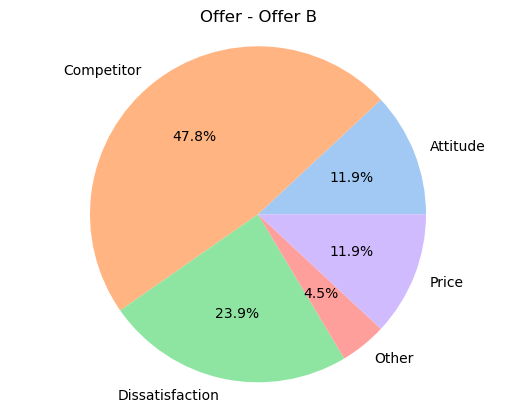

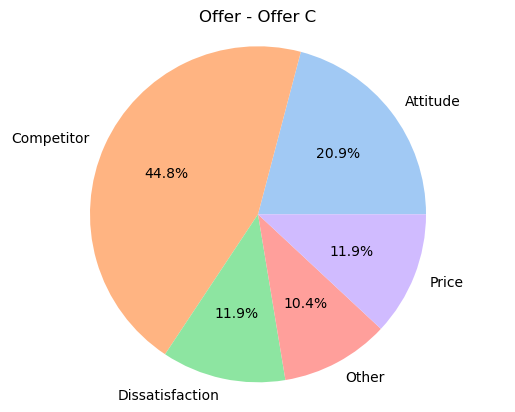

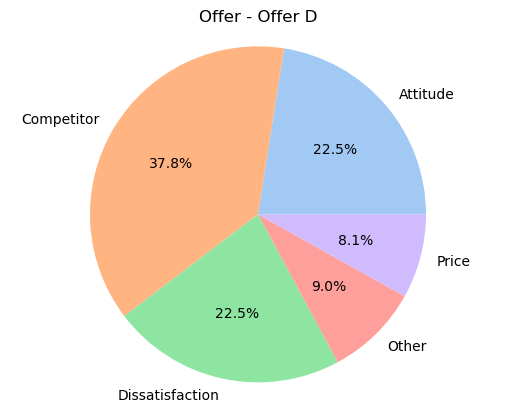

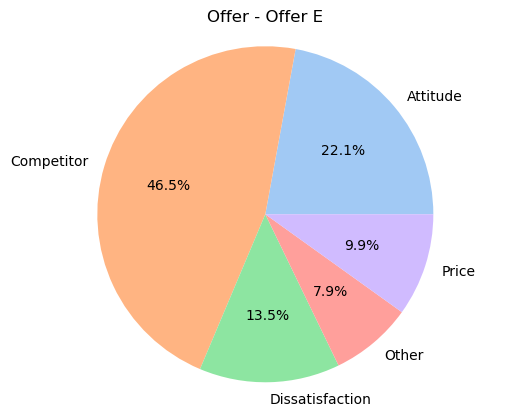

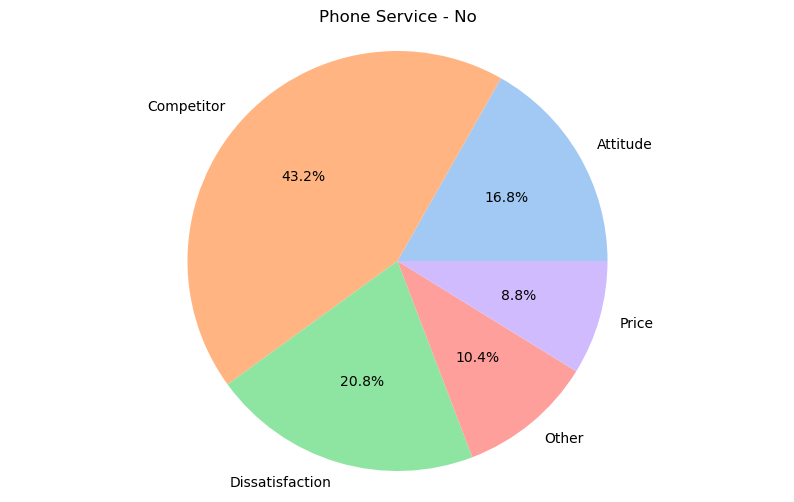

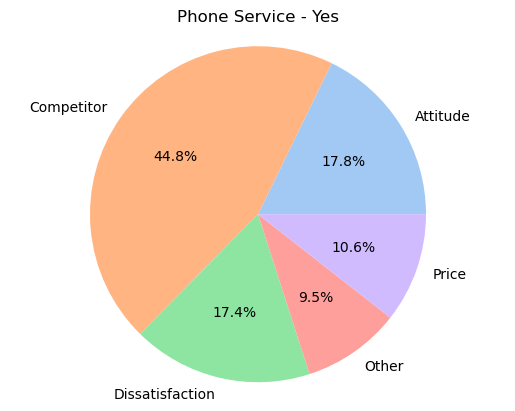

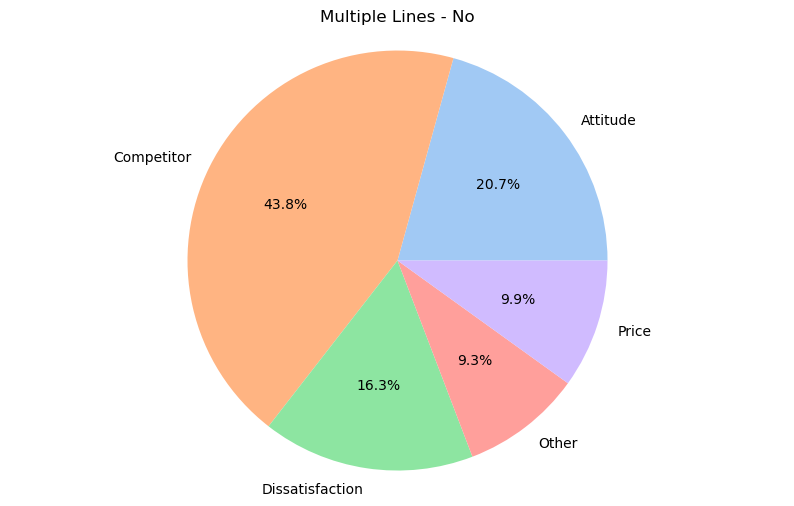

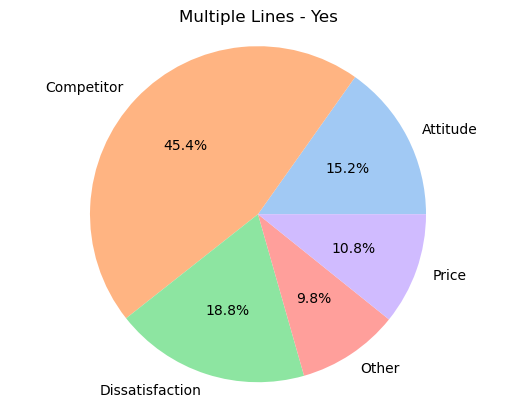

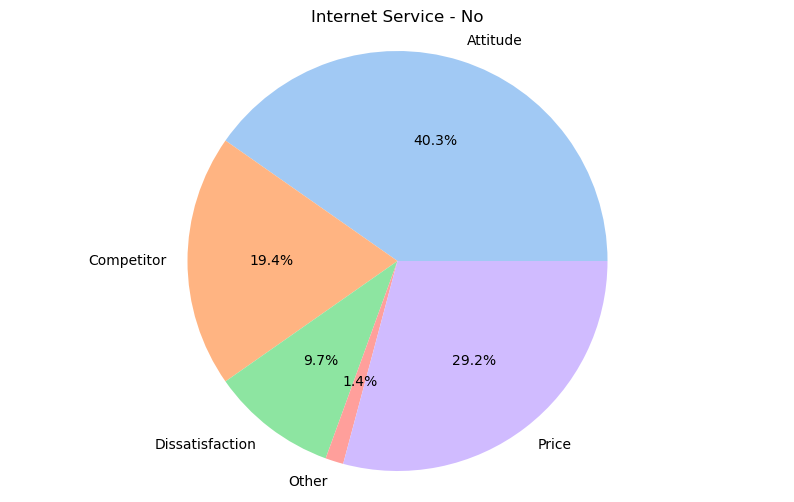

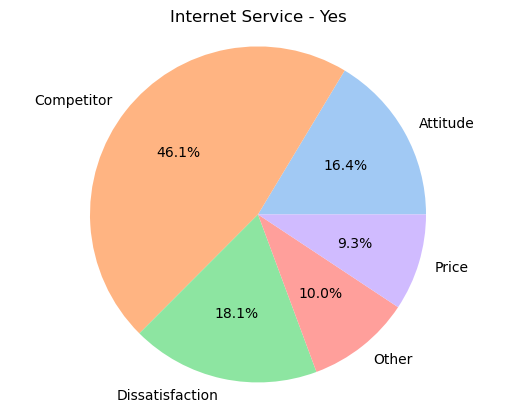

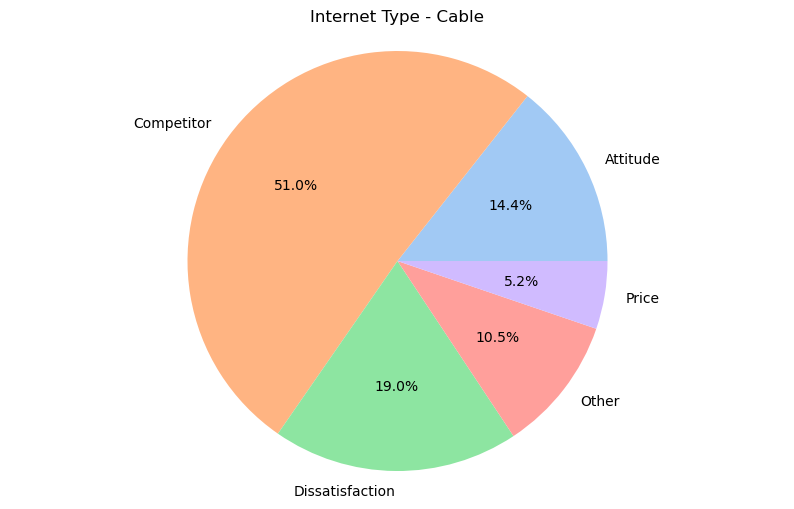

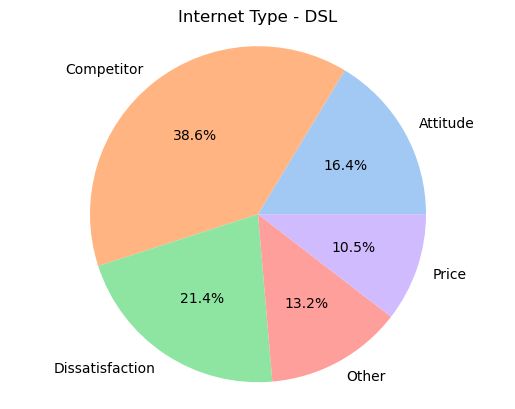

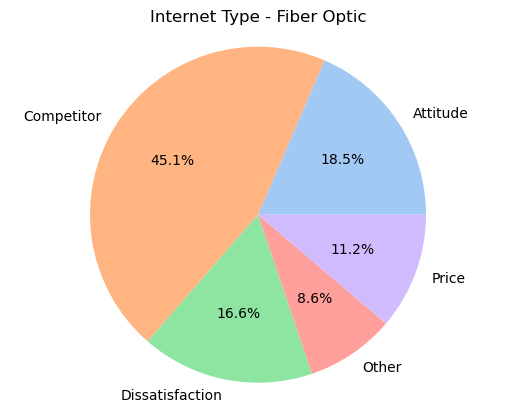

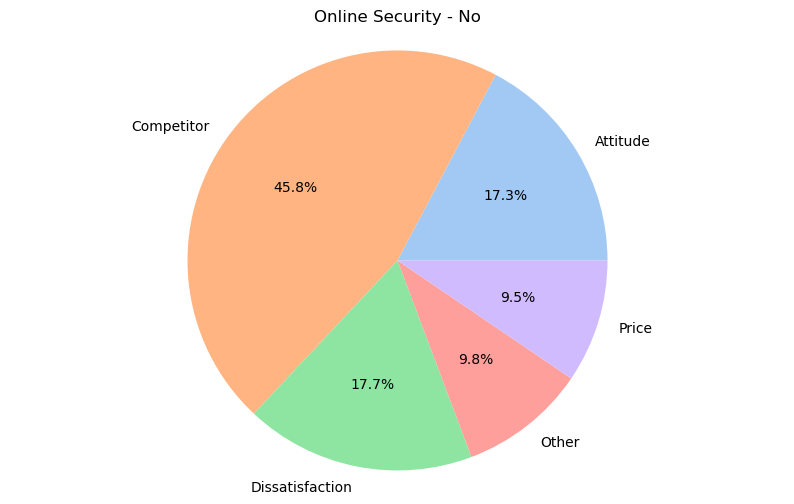

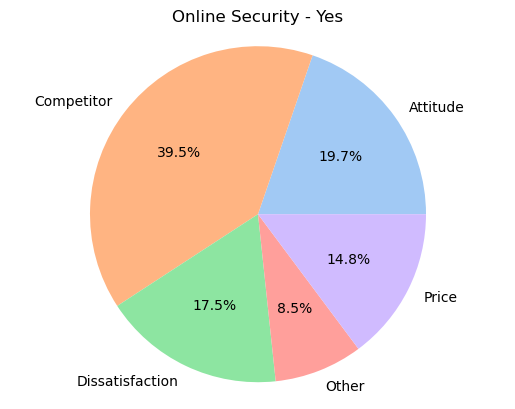

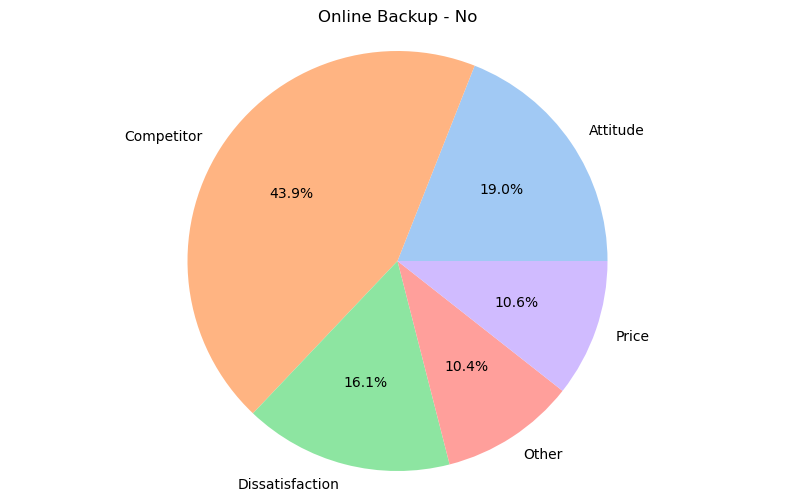

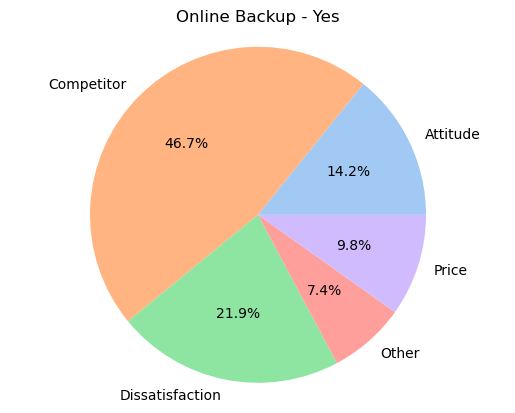

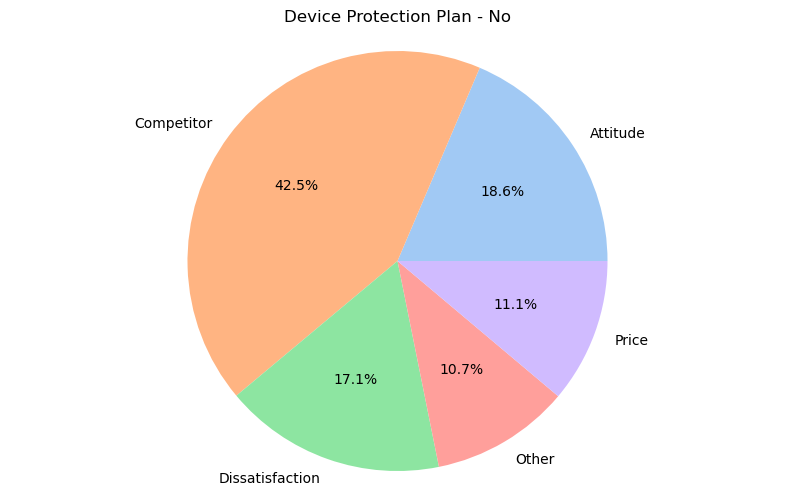

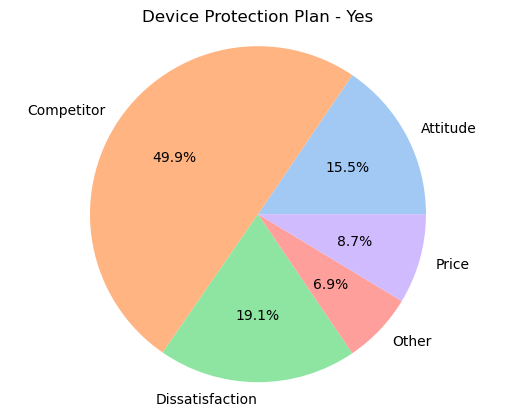

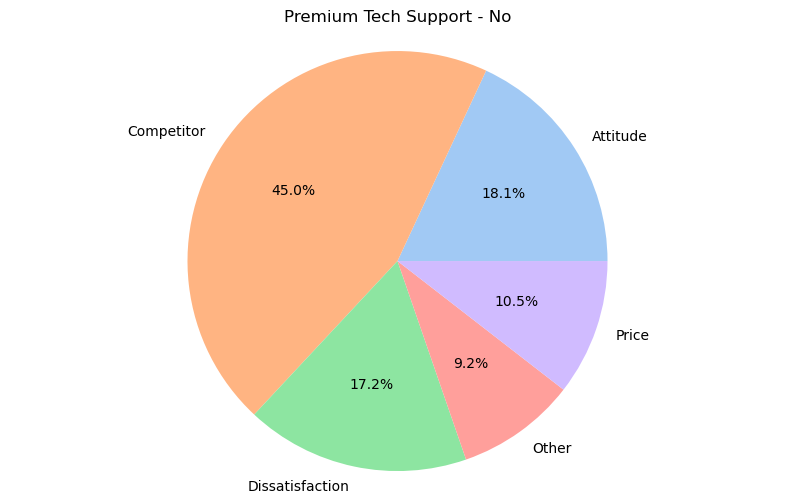

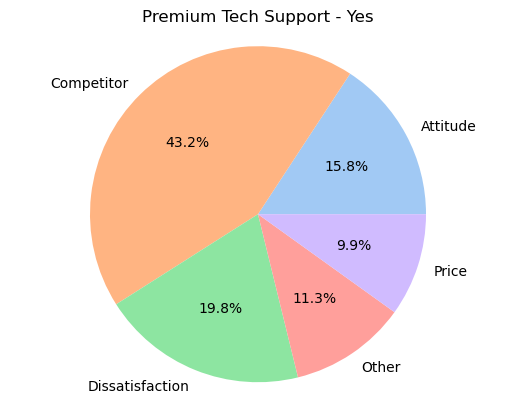

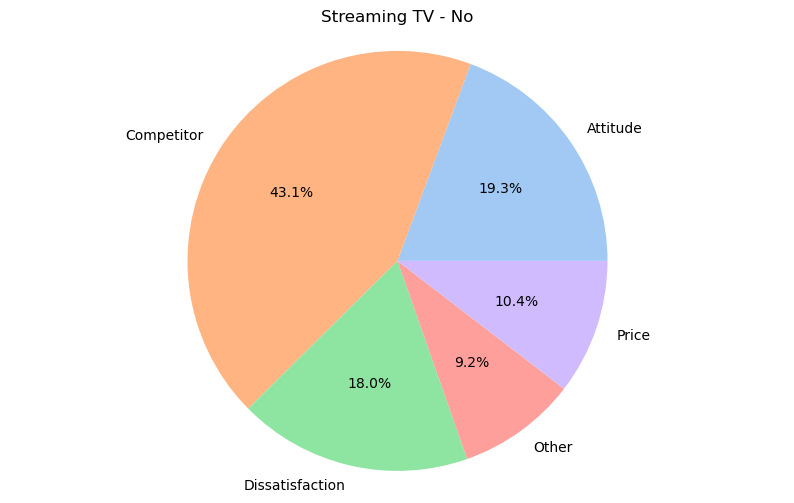

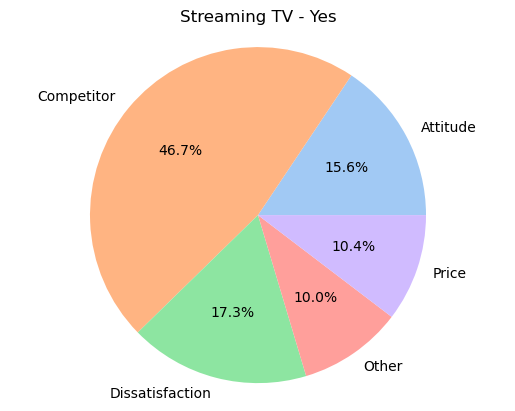

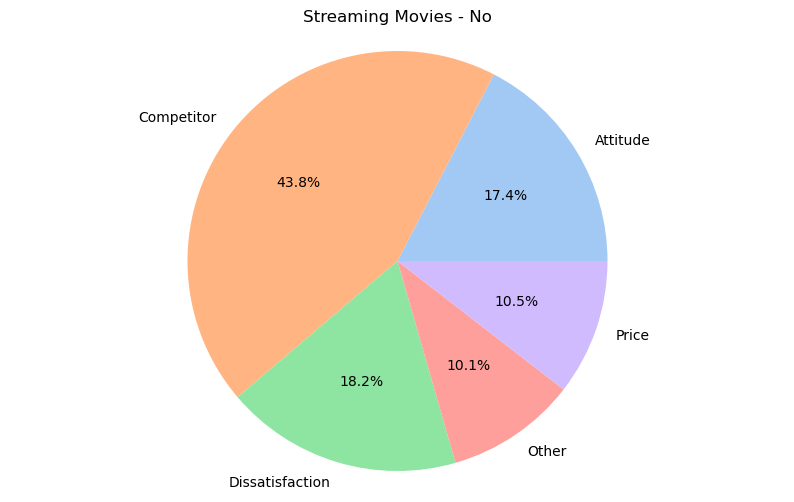

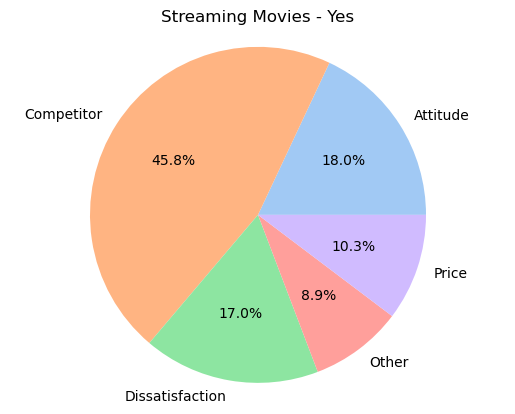

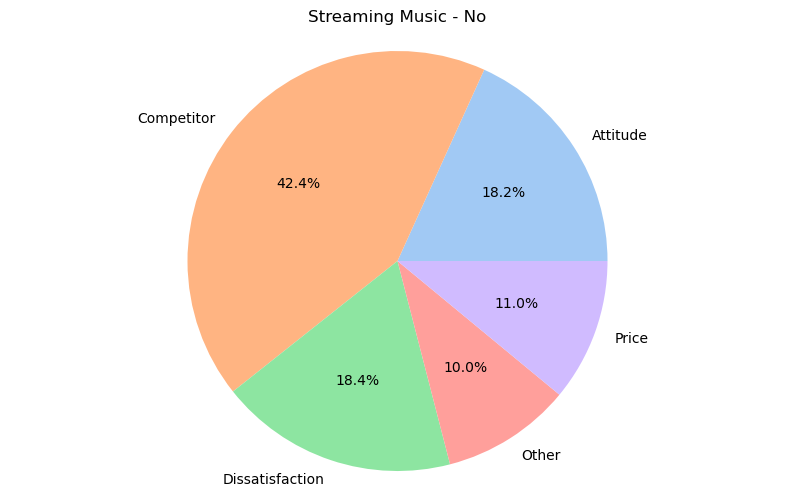

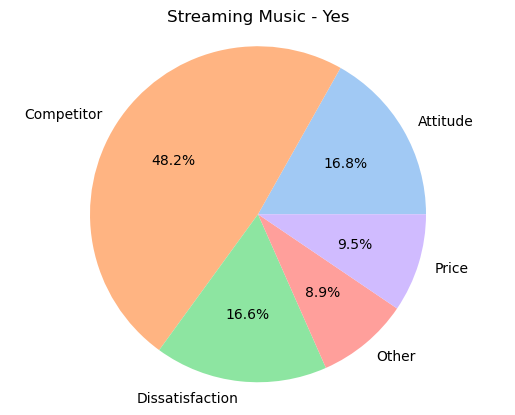

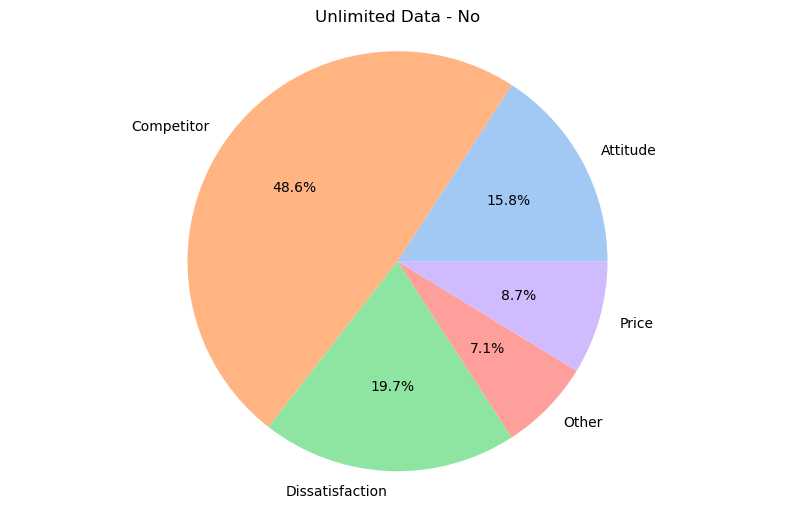

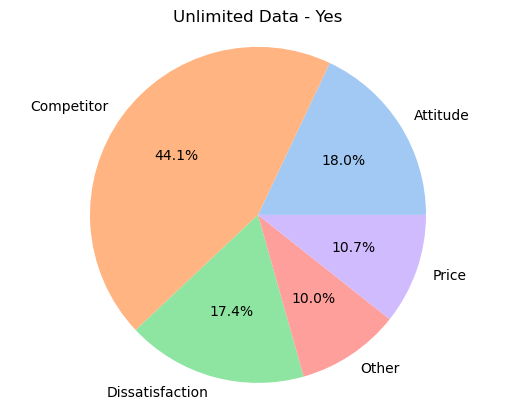

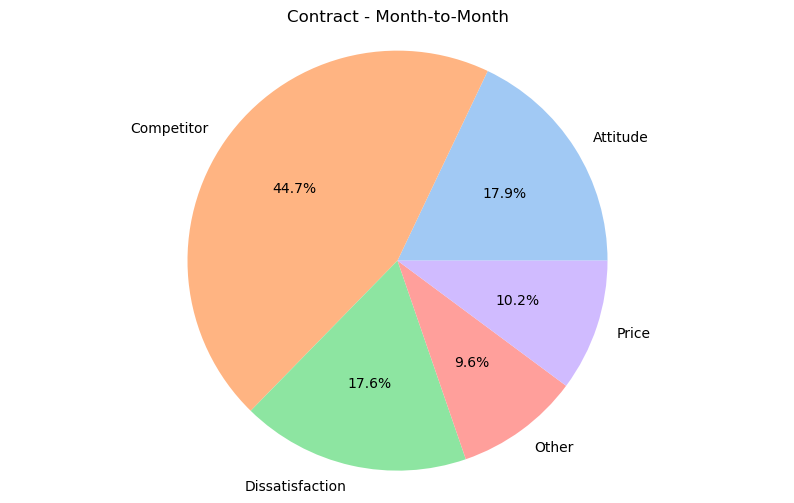

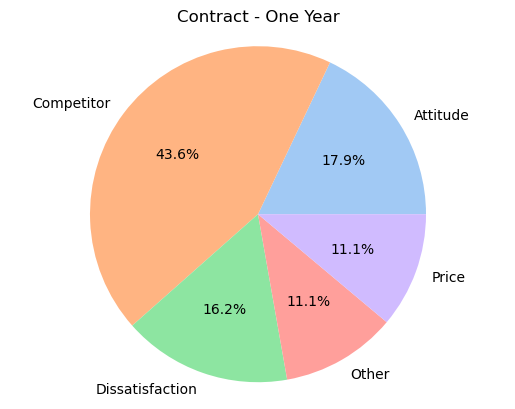

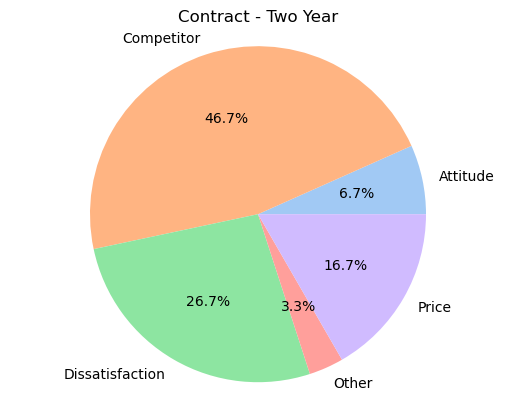

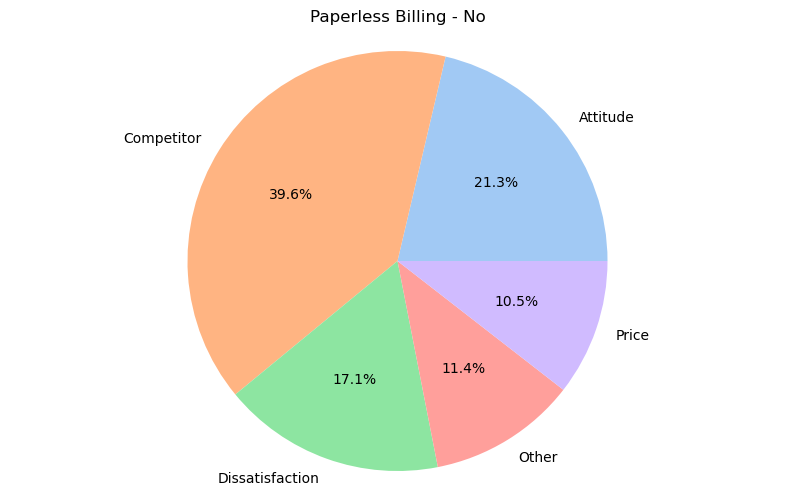

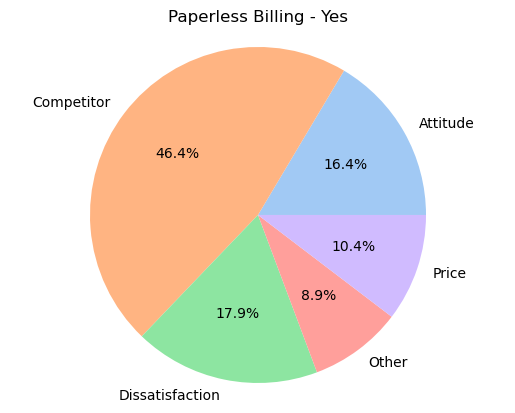

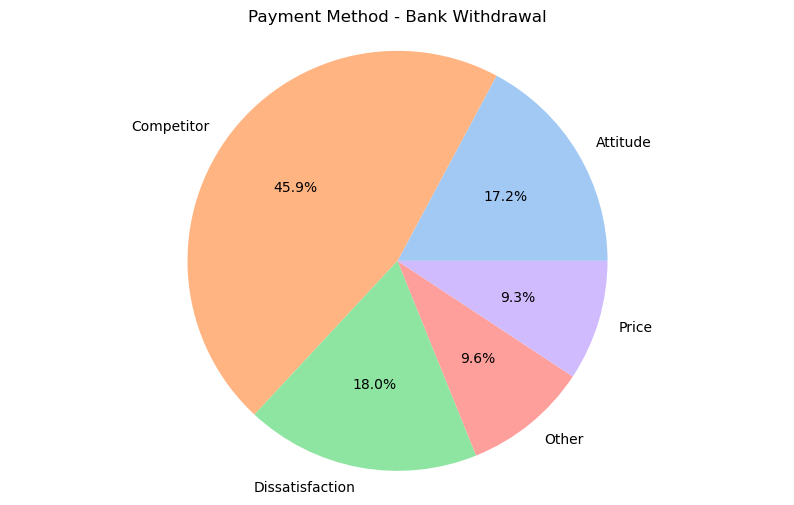

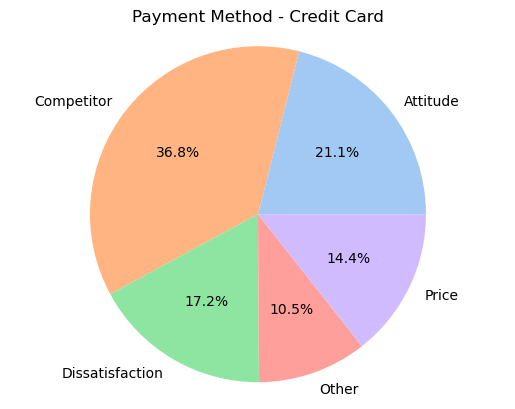

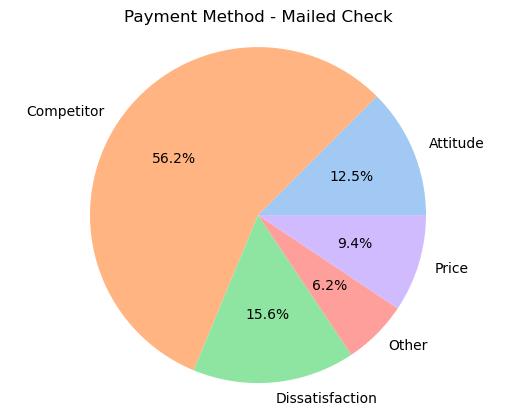

In [12]:
# Group by each categorical column and 'Churn Category', and get value counts for each category
for col in cat_cols_res:
    plt.figure(figsize=(10, 6))
    plt.title(f"Pie Chart for '{col}' - Comparison of Churn Categories")

    # Group the data by 'Churn Category' and the current column, and get value counts for each category
    group_counts = df_reason.groupby([col, 'Churn Category']).size().unstack()

    # Get the list of 'Churn Category' values
    churn_categories = group_counts.columns

    # Iterate through each category and plot the pie chart
    for category in group_counts.index:
        category_counts = group_counts.loc[category]
        plt.pie(category_counts, labels=churn_categories, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
        plt.title(f"{col} - {category}")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()


In [13]:
#TODO: Apply dimensionality reduction to churn reason analysis. Currently the features are really noisy
#TODO: Redo EDA to check for Distribution, central tendancy and dispersions.